In [1]:
import sys
print("Python version")
print(sys.version)

Python version
3.6.10 |Anaconda, Inc.| (default, Mar 23 2020, 17:58:33) [MSC v.1916 64 bit (AMD64)]


## Download data

In [2]:
url = "http://apohllo.pl/text/ustawy.tar.gz"
data_path = "./data_lab1/"

In [3]:
import urllib.request
import tarfile

ftpstream = urllib.request.urlopen(url)
thetarfile = tarfile.open(fileobj=ftpstream, mode="r|gz", encoding='utf-8')
thetarfile.extractall(path=data_path)

## For each bill compute the number of the following amendments present in the bill:

- addition of a unit (e.g. dodaje się ust. 5a),

- removal of a unit (e.g. w art. 10 ust. 1 pkt 8 skreśla się),

- change of a unit (e.g. art. 5 otrzymuje brzmienie).

Note that other types of changes, e.g. po wyrazach "na dofinansowanie" dodaje się wyrazy " , z zastrzeżeniem art. 21a,", must not be included in the result.

In [4]:
UNITS = r"(((ust\.|art\.|pkt|§)\s?[1-9]\d*[a-z]*(\-[1-9]\d*)?(\{[1-9]\d*[a-z]*\})?)|(rozdział (([1-9][0-9]*)|I*)[a-z]*)|(lit\. [a-z](\))?))"

ADDITION_OF_A_UNIT = r"\bdodaje (się )?" + UNITS 
REMOVAL_OF_A_UNIT = r"\b((w " + UNITS + r" (skreśla|uchyla) (się)?)|((skreśla|uchyla) (się )?" + UNITS + r"))"
CHANGE_OF_A_UNIT = UNITS + r"\b otrzymuje brzmienie\b"

HEADER = r"U\s*S\s*T\s*A\s*W\s*A \w*\s?z dnia \d{1,2} \w* \d{4}"

In [5]:
import regex

def find_year(title, content):
    date = regex.findall(HEADER, content, regex.IGNORECASE)
    if not date:  # if empty file
        return title[:4]
    return date[0][-4:]

In [6]:
import os 
import pandas as pd

results = pd.DataFrame(columns = ['year' , 'addition', 'removal' , 'change'])

print("Counting addition, removal and change for each document...")

for filename in os.listdir(data_path):
    if filename.endswith(".txt"): 
        filepath = os.path.join(data_path, filename) 
        content = open(filepath, 'r', encoding='utf-8').read().split()
        content = " ".join(content)
        year = find_year(filename, content)        
        
        addition_of_unit = len(regex.findall(ADDITION_OF_A_UNIT, content))
        
        removal_of_unit = len(regex.findall(REMOVAL_OF_A_UNIT, content))
        
        change_of_unit = len(regex.findall(CHANGE_OF_A_UNIT, content))
        
        results.loc[filename] = [year, addition_of_unit, removal_of_unit, change_of_unit]
    else:
        continue
        
print(results)


Counting addition, removal and change for each document...
              year addition removal change
1993_599.txt  1993       10       4     16
1993_602.txt  1993        1       2      9
1993_645.txt  1993        0       1      0
1993_646.txt  1993       22      10     32
1994_150.txt  1994        0       1      1
...            ...      ...     ...    ...
2004_96.txt   2009        0       0      1
2004_962.txt  2009        0       0      3
2004_963.txt  2004        0       0      1
2004_964.txt  2018       25       2     32
2004_97.txt   2003        1       0     14

[1180 rows x 4 columns]


## Plot results from point 1 showing how the percentage of amendments of a given type changed in the consecutive years.

In [7]:
print("Summing up the amendments of a given type...")
results['total'] = results['addition'] + results['removal'] + results['change']

Summing up the amendments of a given type...


In [8]:
results_by_year = results.groupby(["year"]).sum()
results_by_year

,addition,removal,change,total
year,,,,
1993,35,19,60,114
1994,87,41,75,203
1995,273,124,334,731
1996,297,236,456,989
1997,438,240,660,1338
1998,507,361,862,1730
1999,215,90,228,533
2000,977,544,1370,2891
2001,1238,461,1390,3089


In [9]:
print("Counting percentage for ech type separately...")
results_by_year['add_perc'] = results_by_year['addition'] / results_by_year['total']
results_by_year['rem_perc'] = results_by_year['removal'] / results_by_year['total']
results_by_year['chg_perc'] = results_by_year['change'] / results_by_year['total']
results_by_year

Counting percentage for ech type separately...


,addition,removal,change,total,add_perc,rem_perc,chg_perc
year,,,,,,,
1993,35,19,60,114,0.307018,0.166667,0.526316
1994,87,41,75,203,0.428571,0.201970,0.369458
1995,273,124,334,731,0.373461,0.169631,0.456908
1996,297,236,456,989,0.300303,0.238625,0.461072
1997,438,240,660,1338,0.327354,0.179372,0.493274
1998,507,361,862,1730,0.293064,0.208671,0.498266
1999,215,90,228,533,0.403377,0.168856,0.427767
2000,977,544,1370,2891,0.337945,0.188170,0.473884
2001,1238,461,1390,3089,0.400777,0.149239,0.449984


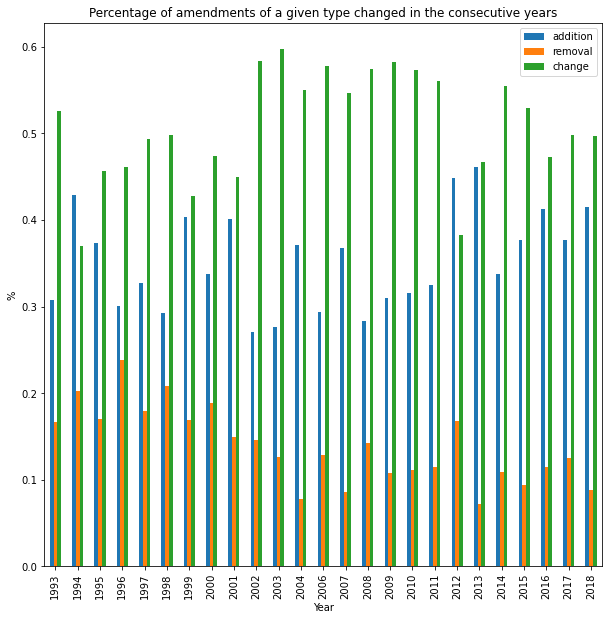

In [10]:
import matplotlib.pyplot as plt

plt_df = {
    'x': results_by_year.index,
    'addition': results_by_year['add_perc'],
    'removal': results_by_year['rem_perc'],
    'change':results_by_year['chg_perc']
}

plt_df = pd.DataFrame(plt_df)
plt_df.plot('x', y=['addition', 'removal', 'change'], figsize=(10, 10), kind="bar")
plt.title('Percentage of amendments of a given type changed in the consecutive years')
plt.xlabel('Year')
plt.ylabel('%')
plt.show()

This task shows how complicated the Polish language is; lower- or uppercase letters and various white spaces is rather not a biggest problem - reflexive pronouns could be missed, words in one sentence could be placed differently, whole range of synonyms, numbering method for units and so on.  You could probably find more specific cases among the documents given, but you could already see a general trend in the bar chart shown above. 

Each year the highest bar is for change and the lowest is for removal.

## Compute the total number of occurrences of the word ustawa in any inflectional form (ustawa, ustawie, ustawę, etc.) and all spelling forms (ustawa, Ustawa, USTAWA), excluding other words with the same prefix (e.g. ustawić)

In [11]:
import morfeusz2
morf = morfeusz2.Morfeusz()

In [12]:
print("Generating the set of all inflectional form of word ustawa (excluding other words with the same prefix and shortcuts)...")

forms = morf.generate("ustawa")
forms = pd.DataFrame(forms, columns=['inflected form', 'base form', 'tags', 'categories', 'misc'])
forms = forms[~forms['tags'].str.contains('brev')]
forms = set(list(forms['inflected form']))  # clear duplicates
forms

Generating the set of all inflectional form of word ustawa (excluding other words with the same prefix and shortcuts)...


{'ustaw',
 'ustawa',
 'ustawach',
 'ustawami',
 'ustawie',
 'ustawo',
 'ustawom',
 'ustawy',
 'ustawą',
 'ustawę'}

I removed duplicates like "ustawy" - "ustawy" is subst:sg:gen:f and subst:pl:nom.acc.voc:f - I removed one of them, because regex is not looking for different meaning, but the string of characters.

I also removed the shortcut "U", which could be also interpretated as "preposition creating phrases indicating ('u cioci')".

In [13]:
results_4 = pd.DataFrame(columns = ['year' , 'occurrences'])

for filename in os.listdir(data_path):
    if filename.endswith(".txt"): 
        count = 0
        filepath = os.path.join(data_path, filename) 
        content = open(filepath, 'r', encoding='utf-8').read().split()
        content = " ".join(content)
        year = find_year(filename, content)
        
        for form in forms:
            word = r'\b' + form + r'\b'
            count += len(regex.findall(word, content, regex.IGNORECASE))
        
        results_4.loc[filename] = [year, count]
    else:
        continue


In [14]:
results_by_year_4 = results_4.groupby(["year"]).sum()
results_by_year_4

,occurrences
year,
1993,175
1994,532
1995,920
1996,908
1997,2042
1998,2104
1999,1000
2000,3260
2001,4191


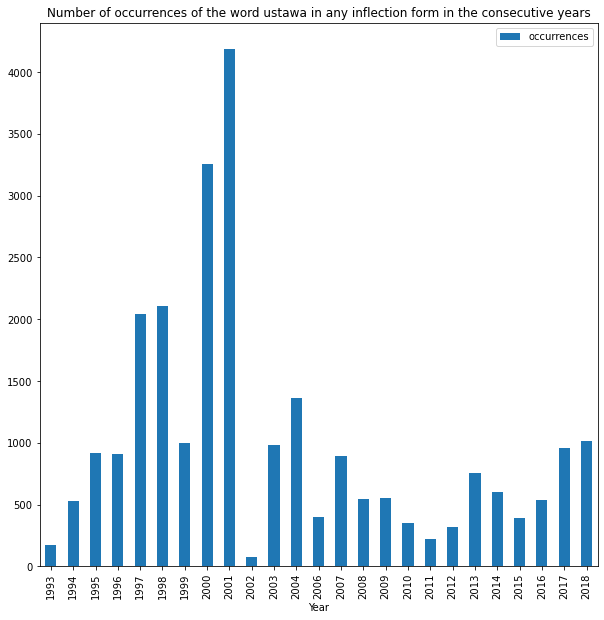

In [15]:
results_by_year_4.plot(figsize=(10, 10), kind="bar")
plt.title('Number of occurrences of the word ustawa in any inflection form in the consecutive years')
plt.xlabel('Year')
plt.show()

In [16]:
sum_4 = results_by_year_4.sum()['occurrences']
print("Total number of occurrences of the word ustawa in any inflectional form is", sum_4)

Total number of occurrences of the word ustawa in any inflectional form is 25092


## Compute the total number of occurrences of the same word (same conditions), followed by z dnia expression.

In [17]:
results_5 = pd.DataFrame(columns = ['year' , 'occurrences'])

for filename in os.listdir(data_path):
    if filename.endswith(".txt"): 
        count = 0 
        filepath = os.path.join(data_path, filename) 
        content = open(filepath, 'r', encoding='utf-8').read().split()
        content = " ".join(content)
        year = find_year(filename, content)     
        
        for form in forms:
            word = r'\b' + form + r'\b(?= z dnia) '
            count += len(regex.findall(word, content, regex.IGNORECASE))
        
        results_5.loc[filename] = [year, count]
    else:
        continue

In [18]:
results_by_year_5 = results_5.groupby(["year"]).sum()
results_by_year_5

,occurrences
year,
1993,50
1994,156
1995,223
1996,311
1997,716
1998,647
1999,405
2000,1053
2001,1269


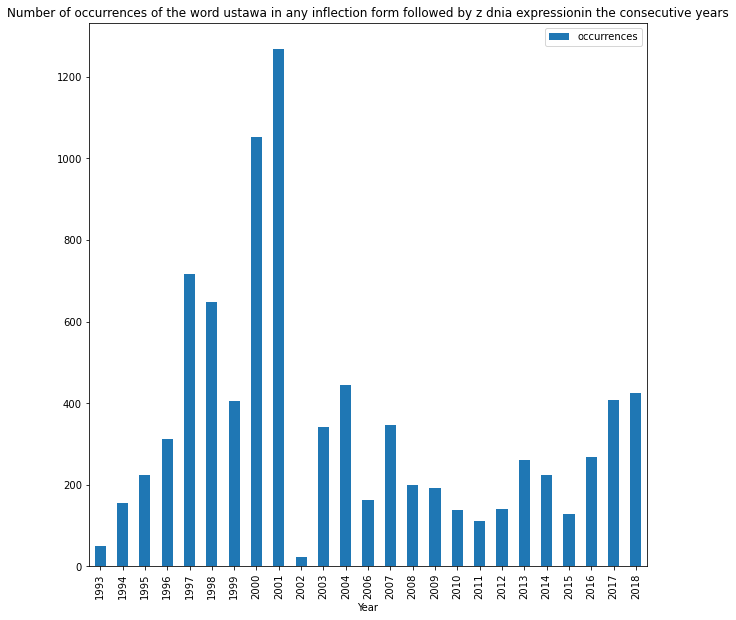

In [19]:
results_by_year_5.plot(figsize=(10, 10), kind="bar")
plt.title('Number of occurrences of the word ustawa in any inflection form followed by z dnia expressionin the consecutive years')
plt.xlabel('Year')
plt.show()

In [20]:
sum_5 =  results_by_year_5.sum()['occurrences']
print("Total number of occurrences of the word ustawa in any inflectional form followed by z dnia expression is", sum_5)

Total number of occurrences of the word ustawa in any inflectional form followed by z dnia expression is 8639


## As above, but not followed by z dnia expression. Is the result correct (result 4 =? result 5 + result 6)?

In [21]:
results_6 = pd.DataFrame(columns = ['year' , 'occurrences'])

for filename in os.listdir(data_path):
    if filename.endswith(".txt"): 
        count = 0
        filepath = os.path.join(data_path, filename) 
        content = open(filepath, 'r', encoding='utf-8').read().split()
        content = " ".join(content)
        year = find_year(filename, content)
        
        for form in forms:
            word = r'\b' + form + r'\b(?! z dnia)'
            count += len(regex.findall(word, content, regex.IGNORECASE))
        results_6.loc[filename] = [year, count]
    else:
        continue

In [22]:
results_by_year_6 = results_6.groupby(["year"]).sum()
results_by_year_6

,occurrences
year,
1993,125
1994,376
1995,697
1996,597
1997,1326
1998,1457
1999,595
2000,2207
2001,2922


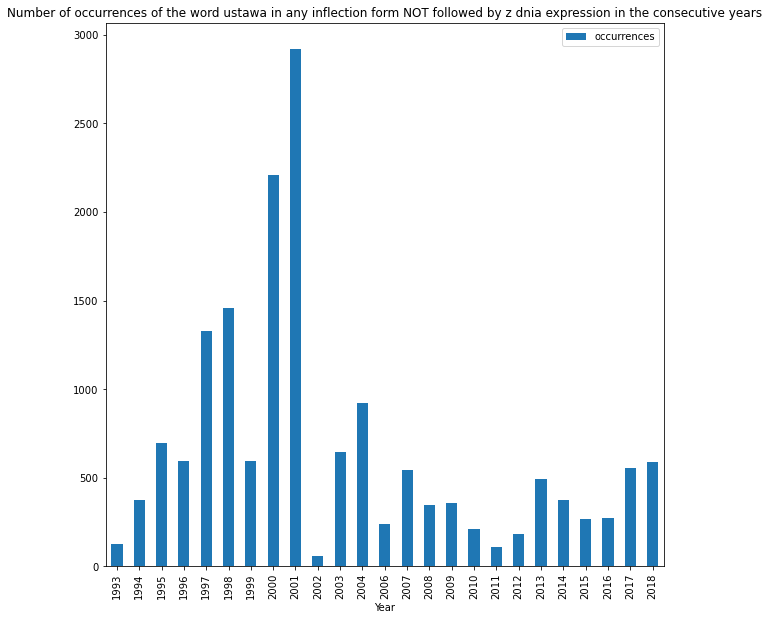

In [23]:
results_by_year_6.plot(figsize=(10, 10), kind="bar")
plt.title('Number of occurrences of the word ustawa in any inflection form NOT followed by z dnia expression in the consecutive years')
plt.xlabel('Year')
plt.show()

In [24]:
sum_6 = results_by_year_6.sum()['occurrences']
print("Total number of occurrences of the word ustawa in any inflectional form NOT followed by z dnia expression is", sum_6)

Total number of occurrences of the word ustawa in any inflectional form NOT followed by z dnia expression is 16453


In [25]:
sum_6 + sum_5 == sum_4

True

The sum of results is correct, what makes sense.

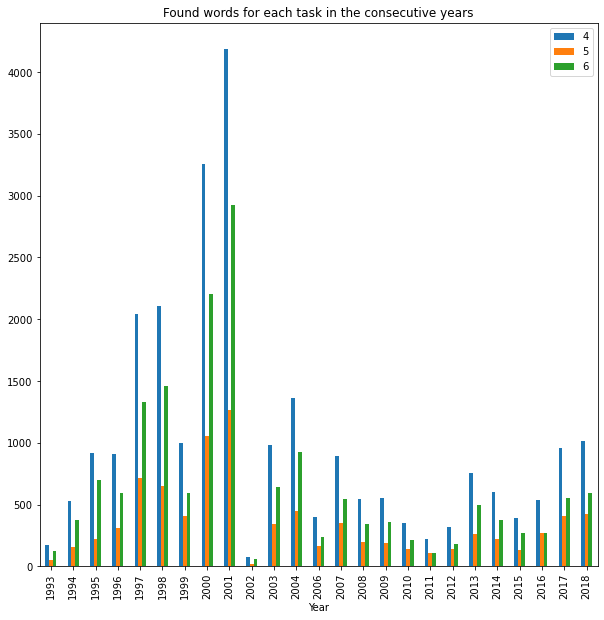

In [26]:
res_4_5_6 = {
    'year': results_by_year_6.index,
    '4': results_by_year_4['occurrences'],
    '5': results_by_year_5['occurrences'],
    '6': results_by_year_6['occurrences']
}

plt_df = pd.DataFrame(res_4_5_6)
plt_df.plot('year', y=['4', '5', '6'], figsize=(10, 10), kind="bar")
plt.title('Found words for each task in the consecutive years')
plt.xlabel('Year')
plt.show()

Each year more occurrences of word 'ustawa' is not followed by 'z dnia'. 

## Compute the total number of occurrences of the word ustawa in any inflectional form, excluding occurrences following o zmianie expression.


In [27]:
results_7 = pd.DataFrame(columns = ['year' , 'occurrences'])

for filename in os.listdir(data_path):
    if filename.endswith(".txt"): 
        count = 0
        filepath = os.path.join(data_path, filename) 
        content = open(filepath, 'r', encoding='utf-8').read().split()
        content = " ".join(content)
        year = find_year(filename, content)
        
        for form in forms:
            word = r'(?<!o zmianie)( ' + form + r')\b'
            count += len(regex.findall(word, content, regex.IGNORECASE))
        
        results_7.loc[filename] = [year, count]
    else:
        continue

In [28]:
results_by_year_7 = results_7.groupby(["year"]).sum()
results_by_year_7

,occurrences
year,
1993,170
1994,500
1995,877
1996,867
1997,1967
1998,2015
1999,933
2000,3133
2001,4069


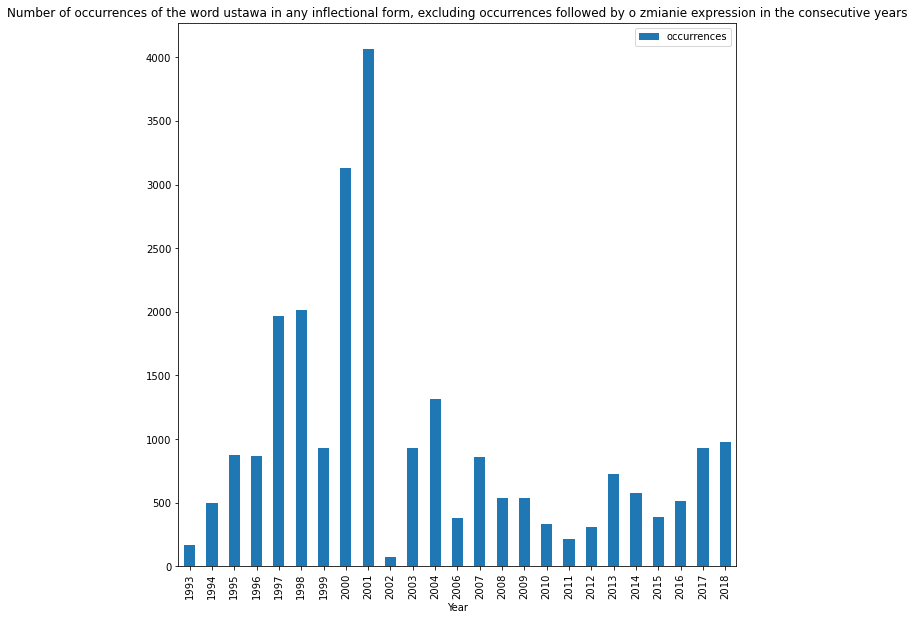

In [29]:
results_by_year_7.plot(figsize=(10, 10), kind="bar")
plt.title('Number of occurrences of the word ustawa in any inflectional form, excluding occurrences followed by o zmianie expression in the consecutive years')
plt.xlabel('Year')
plt.show()

In [30]:
sum_7 = results_by_year_7.sum()['occurrences']
print("Total number of occurrences of the word ustawa in any inflectional form, excluding occurrences followed by o zmianie expression is", sum_7)

Total number of occurrences of the word ustawa in any inflectional form, excluding occurrences followed by o zmianie expression is 24132


The number of word "ustawa" in any inflectional form, excluding occurrenced followed by "o zmianie", is lower than the number of word "ustawa" in any inflectional form, so not all existing words ustawa is followed by "o zmianie".

Negative lookahead and positive lookbehind is really useful for conditional phrase search.